**Installation of required Packages and libraries**

In [1]:
!pip install textblob
!pip install tweepy

In [2]:
!pip install langdetect

     |████████████████████████████████| 981 kB 25.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=736fd71a82380b69fc38bd1d79f5f09dbeb3f9a2be7616fe0919aa8bb5c49d0f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 11.7 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=aa95bca3837370392d44d3cde04bd6e123d026e2ff34d7846cca183bfaf24ca5
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [6]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "



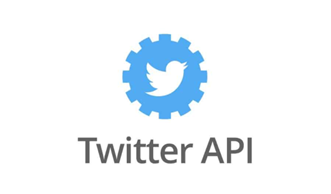

**Extracting Twitter data with API**

In [4]:
consumer_key="KttnYYnl5nJVp6oUzAAooYBZC"
consumer_secret="e2kyx5RKcljzLsBuseB8mWXX5Qo5F7zx0ExpffFAvfVFSAOjPP"
access_token="1235994941135912960-03Skyj6HlM75ebx66KVZkAAjTNmEdM"
access_token_secret="Jp4J3J1oefK9jF7d886ePwiTOsihlLPRAHD2EC7HVPOAG"

import tweepy
from time import sleep

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api= tweepy.API(auth)

**Using Vader from NLTK for Sentiment Analysis**

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**SENTIMENT ANALYSIS WITH VADER**



In [8]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
   negative_list.append(tweet.text)
   negative += 1
 elif pos > neg:
   positive_list.append(tweet.text)
   positive += 1
 
 elif pos == neg:
   neutral_list.append(tweet.text)
   neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: omicron, covid19
Please enter how many tweets to analyze: 2500


**Creating a Dataframe with Sentiments from Twitter API**

In [9]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  2500
positive number:  569
negative number:  578
neutral number:  1353


In [10]:
negative_list["Sentiment"] = 2
positive_list["Sentiment"] = 1
neutral_list["Sentiment"] = 0

**Sentiment Analysis Result**

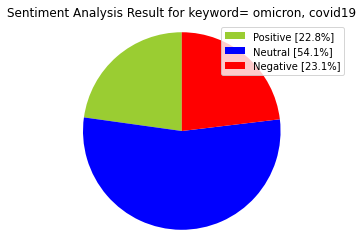

In [11]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'')
plt.axis('equal')
plt.show()

In [14]:
tweets_final=pd.concat([negative_list,positive_list,neutral_list])

In [15]:
#export_csv = tweets_final.to_csv (r'./tweets_final.csv', header=True)

**Data Cleaning Process:**

In [20]:
tweets= pd.read_csv('/content/tweets_final.csv')


In [21]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [23]:
tweets['tidy_tweet'] = np.vectorize(remove_pattern)(tweets['tweets'], "@[\w]*") 
tweets.head()

,tweets,Sentiment,tidy_tweet
0,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT : BREAKING—First #Omicron US death in Texas...
1,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT : BREAKING—First #Omicron US death in Texas...
2,"#Biden says he's ""considering reversing"" the c...",2,"#Biden says he's ""considering reversing"" the c..."
3,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT : BREAKING—First #Omicron US death in Texas...
4,RT @07cameron18: R.I.P. Ryan Whitaker 😇\nR.I.P...,2,RT : R.I.P. Ryan Whitaker 😇\nR.I.P. Daniel Sha...


In [24]:
tweets['tidy_tweet'] = tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
tweets.head(10)

,tweets,Sentiment,tidy_tweet
0,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT BREAKING First #Omicron US death in Texas...
1,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT BREAKING First #Omicron US death in Texas...
2,"#Biden says he's ""considering reversing"" the c...",2,#Biden says he s considering reversing the c...
3,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT BREAKING First #Omicron US death in Texas...
4,RT @07cameron18: R.I.P. Ryan Whitaker 😇\nR.I.P...,2,RT R I P Ryan Whitaker R I P Daniel Shav...
5,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT BREAKING First #Omicron US death in Texas...
6,RT @TexGEOas: .\nCovid19 appeared... Flu disap...,2,RT Covid appeared Flu disappeared De...
7,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT BREAKING First #Omicron US death in Texas...
8,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,RT BREAKING First #Omicron US death in Texas...
9,RT @CBCManitoba: As the Omicron variant threat...,2,RT As the Omicron variant threatens to overw...


In [25]:
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [26]:
tweets

,tweets,Sentiment,tidy_tweet
0,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,BREAKING First #Omicron death Texas unvaccinat...
1,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,BREAKING First #Omicron death Texas unvaccinat...
2,"#Biden says he's ""considering reversing"" the c...",2,#Biden says considering reversing current trav...
3,RT @DrEricDing: BREAKING—First #Omicron US dea...,2,BREAKING First #Omicron death Texas unvaccinat...
4,RT @07cameron18: R.I.P. Ryan Whitaker 😇\nR.I.P...,2,Ryan Whitaker Daniel Shaver Eric Garner George...
...,...,...,...
2495,"RT @CDCgov: As of 12/20/21, #Omicron has been ...",0,#Omicron been detected most states territories...
2496,RT @LorentzMathias: #Attal annonce tranquillem...,0,#Attal annonce tranquillement emeDose prot for...
2497,RT @_Bilderberg_: Le directeur général de l’#O...,0,directeur #OMS TedrosGebreyesus confirme #Vari...
2498,RT @AWokeZombie: #NY #COVID19 Ithaca data on w...,0,#COVID Ithaca data what supposed mostly Omicro...


**Clean Data for Train and Test in Google Cloud**

In [ ]:
export_csv = tweets.to_csv (r'./tweetsFinal.csv', header=True)